# **Tutorial** - Topic Modeling with BERTopic
(last updated 31-05-2021)

we will be exploring how to use BERTopic to create topics from the consumer complaints dataset. The most frequent use-cases and methods are discussed together with important parameters to keep a look out for. 


## BERTopic
BERTopic is a topic modeling technique that leverages 🤗 transformers and a custom class-based TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Enabling the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

[Reference](https://colab.research.google.com/notebooks/gpu.ipynb)

# **Installing BERTopic**

We start by installing BERTopic from PyPi:

Installation can take a while

In [ ]:
%%capture
!pip install bertopic

## Restart the Notebook

(Mandatory)


After installing BERTopic, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

# Data
This is the Bank dataset which contains roughly 61k complaints of the top 10 companies like RBI, SBI, HDFC, etc

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_bank.csv")

In [ ]:
df.head(3)

web-scraper-order  ...                                 new_complaint_body
0   1623517919-9263  ...  Hi, \n\nAmount of rs. 33994 fraudulently got d...
1  1623519367-16991  ...  There was no transaction from last 3 months ju...
2   1623516818-2980  ...  I write this mail in a very heartbroken state....

[3 rows x 18 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60181 entries, 0 to 60180
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   web-scraper-order       60181 non-null  object 
 1   web-scraper-start-url   60181 non-null  object 
 2   title                   60181 non-null  object 
 3   date                    29494 non-null  object 
 4   complaint-des           60181 non-null  object 
 5   user                    60181 non-null  object 
 6   location                51314 non-null  object 
 7   complaint-status        45134 non-null  object 
 8   ack-date                55532 non-null  object 
 9   status                  60181 non-null  object 
 10  title-href              27576 non-null  object 
 11  City                    51314 non-null  object 
 12  State                   51314 non-null  object 
 13  Company Name            60181 non-null  object 
 14  complaint_date_changed  29494 non-null

In [ ]:
df["new_complaint_body"]

0        Hi, \n\nAmount of rs. 33994 fraudulently got d...
1        There was no transaction from last 3 months ju...
2        I write this mail in a very heartbroken state....
3        My name is Swapnil Pimpale and I'm holding an ...
4        I am holding ICICI account and I have withdraw...
                               ...                        
60176    Sir, \n\n\n\nwe are m/s albert medicals bearin...
60177    I have been charged for ecs miss where the bal...
60178    To \n\nAxis bank\n\nThis mail regarding i have...
60179    Hi,\n\n\n\nI am Rahul Yadav, I have changed my...
60180    The amount of Rs 1899 was deducted without any...
Name: new_complaint_body, Length: 60181, dtype: object

## Preprocessing with Texthero


In [ ]:
%%capture
!pip install texthero 

In [ ]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cleaning the data

In [ ]:
from texthero import preprocessing
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_digits,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_stopwords,
                   preprocessing.remove_whitespace,
                   preprocessing.stem]
df["cleaned_complaint_body"] = hero.clean(df["new_complaint_body"], pipeline = custom_pipeline)
df.head()

web-scraper-order  ...                             cleaned_complaint_body
0   1623517919-9263  ...  hi amount rs fraudul got deduct save icici ban...
1  1623519367-16991  ...  transact last month jun aug save bank account ...
2   1623516818-2980  ...  write mail heartbroken state appli icici iprot...
3   1623517132-4883  ...  name swapnil pimpal hold account icici bank pa...
4   1623517938-9366  ...  hold icici account withdraw rs 10k rs 5k centr...

[5 rows x 19 columns]

Specifying addtitional stopwords

In [ ]:
from texthero import stopwords

stopwords_additional = ["pleas","protect","0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]
default_stopwords = stopwords.DEFAULT #add a list of stopwords to the stopwords
custom_stopwords = default_stopwords.union(set(stopwords_additional)) #Call remove_stopwords and pass the custom_stopwords list
df["cleaned_complaint_body"]  = hero.remove_stopwords(df["cleaned_complaint_body"] , custom_stopwords)

### Comparing:

Raw text (Uncleaned)

In [ ]:
df["new_complaint_body"][0]

'Hi, \n\nAmount of rs. 33994 fraudulently got deducted from my savings icici bank account.some one did online transaction and icici is not taking care of this. i have filed a fir but bank is not responding positively. i would like to Lodge a complaint against icici bank. Please find attached documents. \n\n\n\nThank you, \n\nhrishikesh.'

Cleaned text

In [ ]:
df["cleaned_complaint_body"][0]

'   fraudul  deduct save icici bank account  onlin transact icici  care file fir bank respond posit   lodg complaint icici bank   attach document  hrishikesh'

In [ ]:
hero.top_words(df["cleaned_complaint_body"].pipe(hero.clean))

bank       116125
account     91933
card        63882
branch      41042
sbi         40161
            ...  
itimha          1
kollur          1
crrunt          1
paulomi         1
l306676         1
Name: cleaned_complaint_body, Length: 95928, dtype: int64

In [ ]:
df['tf_idf'] = (hero.tfidf(df["cleaned_complaint_body"], max_features=250))

In [ ]:
df['tf_idf'][0:2]

0    [0.0, 0.0, 0.0, 0.1108795700377772, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.31448532741654656, 0.0, 0.0,...
Name: tf_idf, dtype: object

Since TFIDF has a sparse matrix, we will take the principal components

In [ ]:
df['pca'] = hero.pca(df["tf_idf"])

Hard clustering the similar complaints by KMeans

In [ ]:
df['kmeans'] = hero.kmeans(df["tf_idf"])

## Visualization

In [ ]:
hero.scatterplot(df, 'pca', color = 'kmeans', hover_data=['new_complaint_body'] )

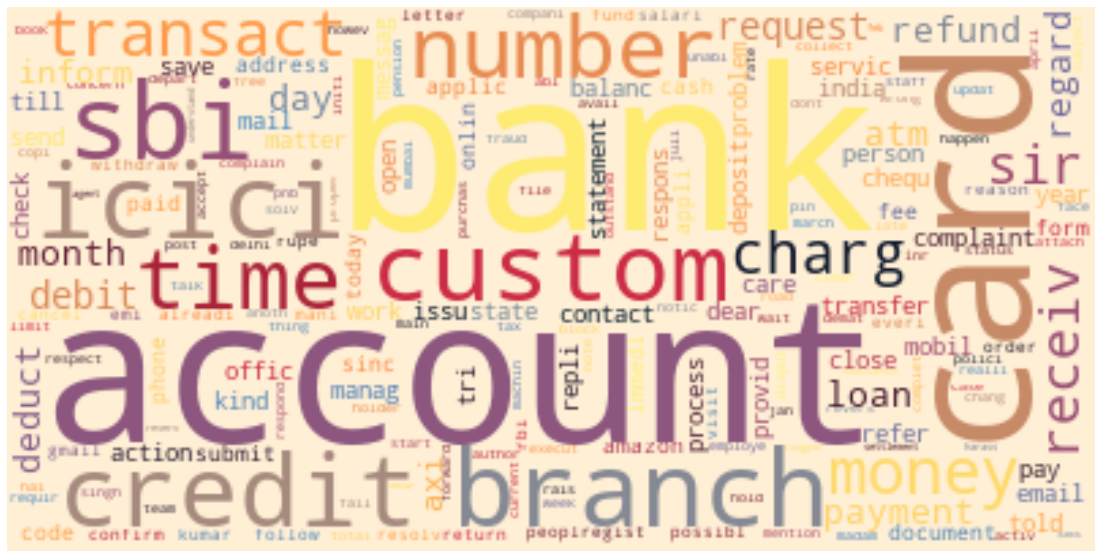

In [ ]:
hero.wordcloud(df['cleaned_complaint_body'].pipe(hero.clean))

# **Topic Modeling**

In this example, we will go through the main components of BERTopic and the steps necessary to create a strong topic model. 




Converting it to list before applying BERTopic

In [ ]:
docs = df["cleaned_complaint_body"].tolist()

In [ ]:
docs[0:10]

['   fraudul  deduct save icici bank account  onlin transact icici  care file fir bank respond posit   lodg complaint icici bank   attach document  hrishikesh',
 'transact  month jun aug save bank account 1st septemb deposit fund anoth account account immedi  levi avail balanc  differ actual balanc rais complaint icici  respons',
 'write mail heartbroken state appli icici iprotect life insur scheme applic number    payment onlin undergon medic test  fortnight sinc medic test  receiv updat issuanc polici onlin applic tracker   pend status medic report contact custom care depart sever occas complaint paid heed  mail  iciciprulif     feb assur mail smses someon    expedit issuanc polici effort  person communic reason delay  custom care    promis   work day problem  resolv problem  remain    sincer effort  compani   anoth mail  iciciprulif  interact    wait work day eventu perpetu struck infinit loop day harass  polici issu send shiver spine thought effort famili member    claim god forbid

## Training

We start by instantiating BERTopic. We set language to `english` since our documents are in the English language. If you would like to use a multi-lingual model, please use `language="multilingual"` instead. 

We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model. 


In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

2021-06-20 05:58:50,211 - BERTopic - Transformed documents to Embeddings


2021-06-20 05:59:52,693 - BERTopic - Reduced dimensionality with UMAP
2021-06-20 06:20:16,842 - BERTopic - Clustered UMAP embeddings with HDBSCAN


**NOTE**: Use `language="multilingual"` to select a model that support 50+ languages.

## Extracting Topics
After fitting our model, we can start by looking at the results. Typically, we look at the most frequent topics first as they best represent the collection of documents. 

In [ ]:
freq = topic_model.get_topic_info(); freq.head(5)

Topic  Count                                     Name
0     -1  31601      -1_minimum_limit_maintain_icicibank
1      0   2552  0_withdrawn_withdraw_withdrawl_withdrew
2      1    743             1_order_seller_product_paytm
3      2    726                 2_pension_ppo_cppc_chowk
4      3    634      3_dishonour_bounc_signatur_indiabul

-1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [ ]:
topic_model.get_topic(2)  # Select the most frequent topic

[('pension', 0.03973999446844565),
 ('ppo', 0.026387398988252028),
 ('cppc', 0.016017109906793697),
 ('chowk', 0.006750607797359896),
 ('railway', 0.004968734899639353),
 ('disabl', 0.004385328805897263),
 ('certif', 0.004368193829220046),
 ('pcda', 0.004220079805141438),
 ('cpc', 0.004211493807865455),
 ('allahabad', 0.003953743135378365)]

**NOTE**: BERTopic is stocastich which means that the topics might differ across runs. This is mostly due to the stocastisch nature of UMAP.

# **Visualization**
There are several visualization options available in BERTopic, namely the visualization of topics, probabilities and topics over time. Topic modeling is, to a certain extent, quite subjective. Visualizations help understand the topics that were created. 

## Visualize Topics
After having trained our `BERTopic` model, we can iteratively go through perhaps a hundred topic to get a good 
understanding of the topics that were extract. However, that takes quite some time and lacks a global representation. 
Instead, we can visualize the topics that were generated in a way very similar to 
[LDAvis](https://github.com/cpsievert/LDAvis):

In [ ]:
topic_model.visualize_topics()

## Visualize Topic Probabilities

The variable `probabilities` that is returned from `transform()` or `fit_transform()` can 
be used to understand how confident BERTopic is that certain topics can be found in a document. 

To visualize the distributions, we simply call:

In [ ]:
topic_model.visualize_distribution(probs[200], min_probability=0.001)

## Visualize Topic Hierarchy

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help selecting an appropriate nr_topics when reducing the number of topics that you have created.

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=50)

## Visualize Terms

We can visualize the selected terms for a few topics by creating bar charts out of the c-TF-IDF scores for each topic representation. Insights can be gained from the relative c-TF-IDF scores between and within topics. Moreover, you can easily compare topic representations to each other.

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

## Visualize Topic Similarity
Having generated topic embeddings, through both c-TF-IDF and embeddings, we can create a similarity matrix by simply applying cosine similarities through those topic embeddings. The result will be a matrix indicating how similar certain topics are to each other.

In [ ]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

## Visualize Term Score Decline
Topics are represented by a number of words starting with the best representative word. Each word is represented by a c-TF-IDF score. The higher the score, the more representative a word to the topic is. Since the topic words are sorted by their c-TF-IDF score, the scores slowly decline with each word that is added. At some point adding words to the topic representation only marginally increases the total c-TF-IDF score and would not be beneficial for its representation.

To visualize this effect, we can plot the c-TF-IDF scores for each topic by the term rank of each word. In other words, the position of the words (term rank), where the words with the highest c-TF-IDF score will have a rank of 1, will be put on the x-axis. Whereas the y-axis will be populated by the c-TF-IDF scores. The result is a visualization that shows you the decline of c-TF-IDF score when adding words to the topic representation. It allows you, using the elbow method, the select the best number of words in a topic.


In [ ]:
topic_model.visualize_term_rank()

# **Topic Representation**
After having created the topic model, you might not be satisfied with some of the parameters you have chosen. Fortunately, BERTopic allows you to update the topics after they have been created. 

This allows for fine-tuning the model to your specifications and wishes. 

## Update Topics
When you have trained a model and viewed the topics and the words that represent them,
you might not be satisfied with the representation. Perhaps you forgot to remove
stopwords or you want to try out a different `n_gram_range`. We can use the function `update_topics` to update 
the topic representation with new parameters for `c-TF-IDF`: 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer_model = CountVectorizer(min_df=5)

In [ ]:
topic_model.update_topics(docs, topics,  n_gram_range=(1,3),vectorizer_model=vectorizer_model)

In [ ]:
topic_model.get_topic(2)   # We select topic that we viewed before

[('pension', 0.03956664116766254),
 ('ppo', 0.027726523518947895),
 ('cppc', 0.01695695996683962),
 ('chowk', 0.0071359003048372715),
 ('central', 0.0051084375927450115),
 ('disabl', 0.004643465259153598),
 ('pcda', 0.004498900508815017),
 ('cpc', 0.004485867501070114),
 ('certif', 0.00448450246287581),
 ('allahabad', 0.004183735438945603)]

## Topic Reduction
We can also reduce the number of topics after having trained a BERTopic model. The advantage of doing so, 
is that you can decide the number of topics after knowing how many are actually created. It is difficult to 
predict before training your model how many topics that are in your documents and how many will be extracted. 
Instead, we can decide afterwards how many topics seems realistic:





In [ ]:
new_topics, new_probs = topic_model.reduce_topics(docs, topics, probs, nr_topics=30)

2021-06-20 07:00:29,506 - BERTopic - Reduced number of topics from 474 to 31


# **Search Topics**
After having trained our model, we can use `find_topics` to search for topics that are similar 
to an input search_term. Here, we are going to be searching for topics that closely relate the 
search term "vehicle". Then, we extract the most similar topic and check the results: 

In [ ]:
similar_topics, similarity = topic_model.find_topics("fraud", top_n=5); similar_topics

[4, 6, -1, 8, 24]

In [ ]:
topic_model.get_topic(4)

[('fraud', 0.029259108006090863),
 ('credit', 0.019779960935683585),
 ('coin', 0.019489793039868968),
 ('card', 0.017157885599469593),
 ('india', 0.015784427805377945),
 ('complaint', 0.014279511982077204),
 ('receiv', 0.012569709765833173),
 ('fraudul', 0.012042729375332675),
 ('fake', 0.010481135139738985),
 ('mail', 0.010462653350274432)]

# **Model serialization**
The model and its internal settings can easily be saved. Note that the documents and embeddings will not be saved. However, UMAP and HDBSCAN will be saved. 

In [ ]:
# Save model
topic_model.save("my_model")	

In [ ]:
# Load model
my_model = BERTopic.load("my_model")	

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
topic_model.visualize_topics()